Implement Bayesian classifier - Discrete Data

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
np.random.seed(10)
n_samples = 100
discrete_class0 = np.random.choice([0, 1, 2], size=(n_samples, 2))
discrete_class1 = np.random.choice([1, 2, 3], size=(n_samples, 2))
X_discrete = np.vstack((discrete_class0, discrete_class1))
y_discrete = np.array([0] * n_samples + [1] * n_samples)

In [8]:
def bayesian_discrete_classifier(X_train, y_train, X_test):
    classes = np.unique(y_train)
    n_features = X_train.shape[1]
    priors = {}
    likelihoods = {}

    for c in classes:
        X_c = X_train[y_train == c]
        priors[c] = len(X_c) / len(X_train)
        likelihoods[c] = []
        for f in range(n_features):
            values, counts = np.unique(X_c[:, f], return_counts=True)
            prob = counts / len(X_c)
            likelihoods[c].append(dict(zip(values, prob)))

    predictions = []
    for x in X_test:
        posteriors = []
        for c in classes:
            posterior = np.log(priors[c])
            for f in range(n_features):
                value = x[f]
                prob = likelihoods[c][f].get(value, 1e-6)
                posterior += np.log(prob)
            posteriors.append(posterior)
        predictions.append(classes[np.argmax(posteriors)])
    return np.array(predictions)

In [9]:
train_idx = np.random.choice(2 * n_samples, size=int(0.8 * 2 * n_samples), replace=False)
test_idx = np.setdiff1d(np.arange(2 * n_samples), train_idx)
X_train, y_train = X_discrete[train_idx], y_discrete[train_idx]
X_test, y_test = X_discrete[test_idx], y_discrete[test_idx]
y_pred = bayesian_discrete_classifier(X_train, y_train, X_test)
accuracy = np.mean(y_pred == y_test)
print(f"Discrete Data Accuracy: {accuracy:.4f}")

Discrete Data Accuracy: 0.7750


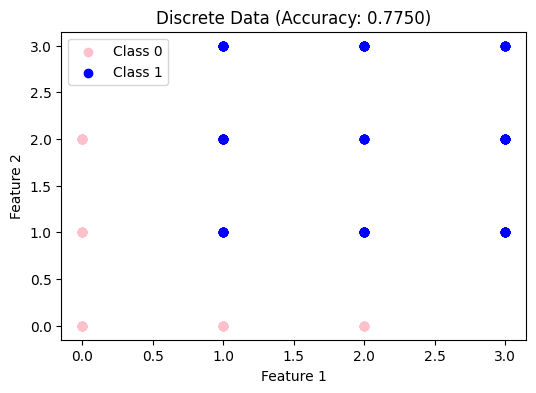

In [10]:
plt.figure(figsize=(6, 4))
plt.scatter(X_discrete[y_discrete == 0, 0], X_discrete[y_discrete == 0, 1], c='pink', label='Class 0')
plt.scatter(X_discrete[y_discrete == 1, 0], X_discrete[y_discrete == 1, 1], c='blue', label='Class 1')
plt.title(f"Discrete Data (Accuracy: {accuracy:.4f})")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()